# Different Target Transofrmations

looking at the final data, it became clear that the target must be transformed for more accurate predictions. This notebook will show prelminary modeling for different powers of my target variable to highlight the selection process behind my choice.

In [2]:
import numpy as np
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
import seaborn as sns
sns.set()
import pandas as pd
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.pipeline import Pipeline
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [16]:
import scipy.stats as stats

In [14]:
def diagnostic_plot(X, y):
    plt.figure(figsize=(20,5))
    
    rgr = LinearRegression()
    rgr.fit(X,y)
    pred = rgr.predict(X)
    
    plt.subplot(1, 2, 1)
    res = y - pred
    plt.scatter(pred, res)
    plt.title("Residual plot")
    plt.xlabel("prediction")
    plt.ylabel("residuals")
    
    plt.subplot(1, 2, 2)
    #Generates a probability plot of sample data against the quantiles of a 
    # specified theoretical distribution 
    stats.probplot(res, dist="norm", plot=plt)
    plt.title("Normal Q-Q plot")

In [7]:
df = pd.read_csv('data/nicedf.csv')

In [24]:
df.head(3)

title      owners  num_reviews  positive  negative      ratio  \
0     OUTRIDERS   1811000.0        41862     26922     14940   1.802008   
1  It Takes Two    776000.0        21082     20205       877  23.038769   
2       Valheim  15510000.0       231017    222551      8466  26.287621   

   pos_percent  neg_percent    ccu  median_2weeks  ...  SEGA  \
0    64.311309    35.688691  23037            279  ...     0   
1    95.840053     4.159947  11513            425  ...     0   
2    96.335335     3.664665  64931            435  ...     0   

   Sokpop Collective  Square Enix  THQ Nordic  Ubisoft  Winged Cloud  other  \
0                  0            1           0        0             0      0   
1                  0            0           0        0             0      0   
2                  0            0           0        0             0      1   

   tinyBuild  owners_log  age  
0          0   14.409390    0  
1          0   13.561908    0  
2          0   16.556996    0  

[3 rows x 100 columns]

In [23]:
df['age'] = 2021 - df.year_released

# Baseline Model with all features

In [9]:
X, y = df.iloc[:,2:], df.iloc[:,1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=7)

In [10]:
lr = LinearRegression()

lr.fit(X_train, y_train)
lr.score(X_train, y_train)

0.7647879859823601

In [11]:
lr.score(X_val, y_val)

0.6382695655473418

Text(0.5, 1.0, 'Simple Regression')

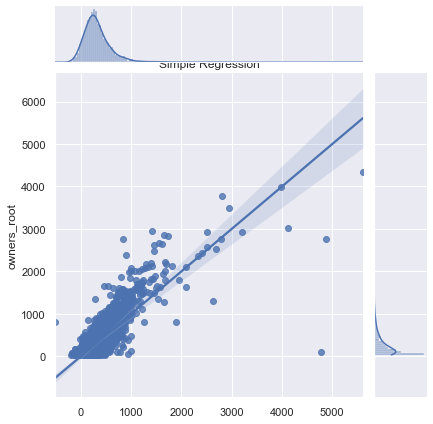

In [59]:
train_preds = lr.predict(X_train)


sns.jointplot(x = train_preds, y = y_train, kind='reg')
plt.title('Simple Regression')

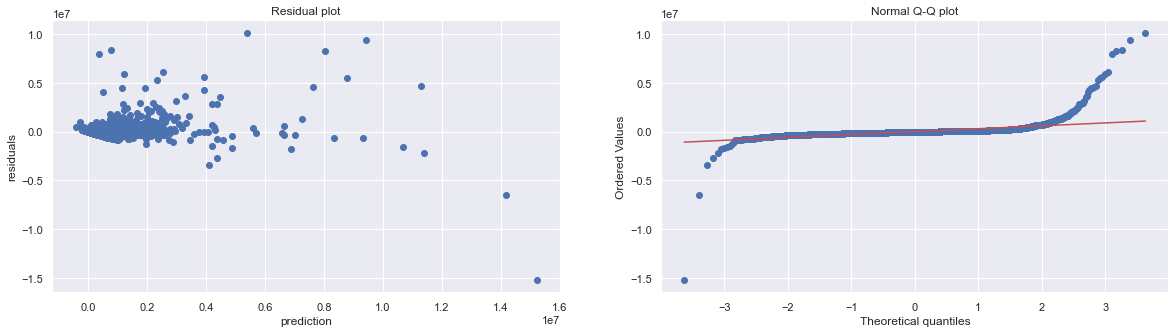

In [17]:
diagnostic_plot(X,y)

<AxesSubplot:>

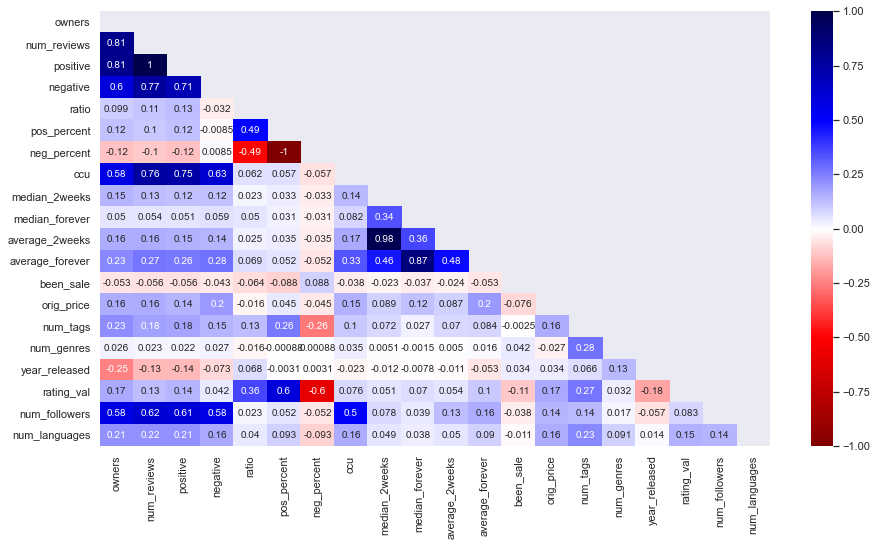

In [19]:
heatmapdf = df.iloc[:,1:21]
plt.figure(figsize(15,8))
upper = np.triu(heatmapdf.corr())
sns.heatmap(heatmapdf.corr(), cmap="seismic_r", annot=True, vmin=-1, vmax=1, mask=upper)



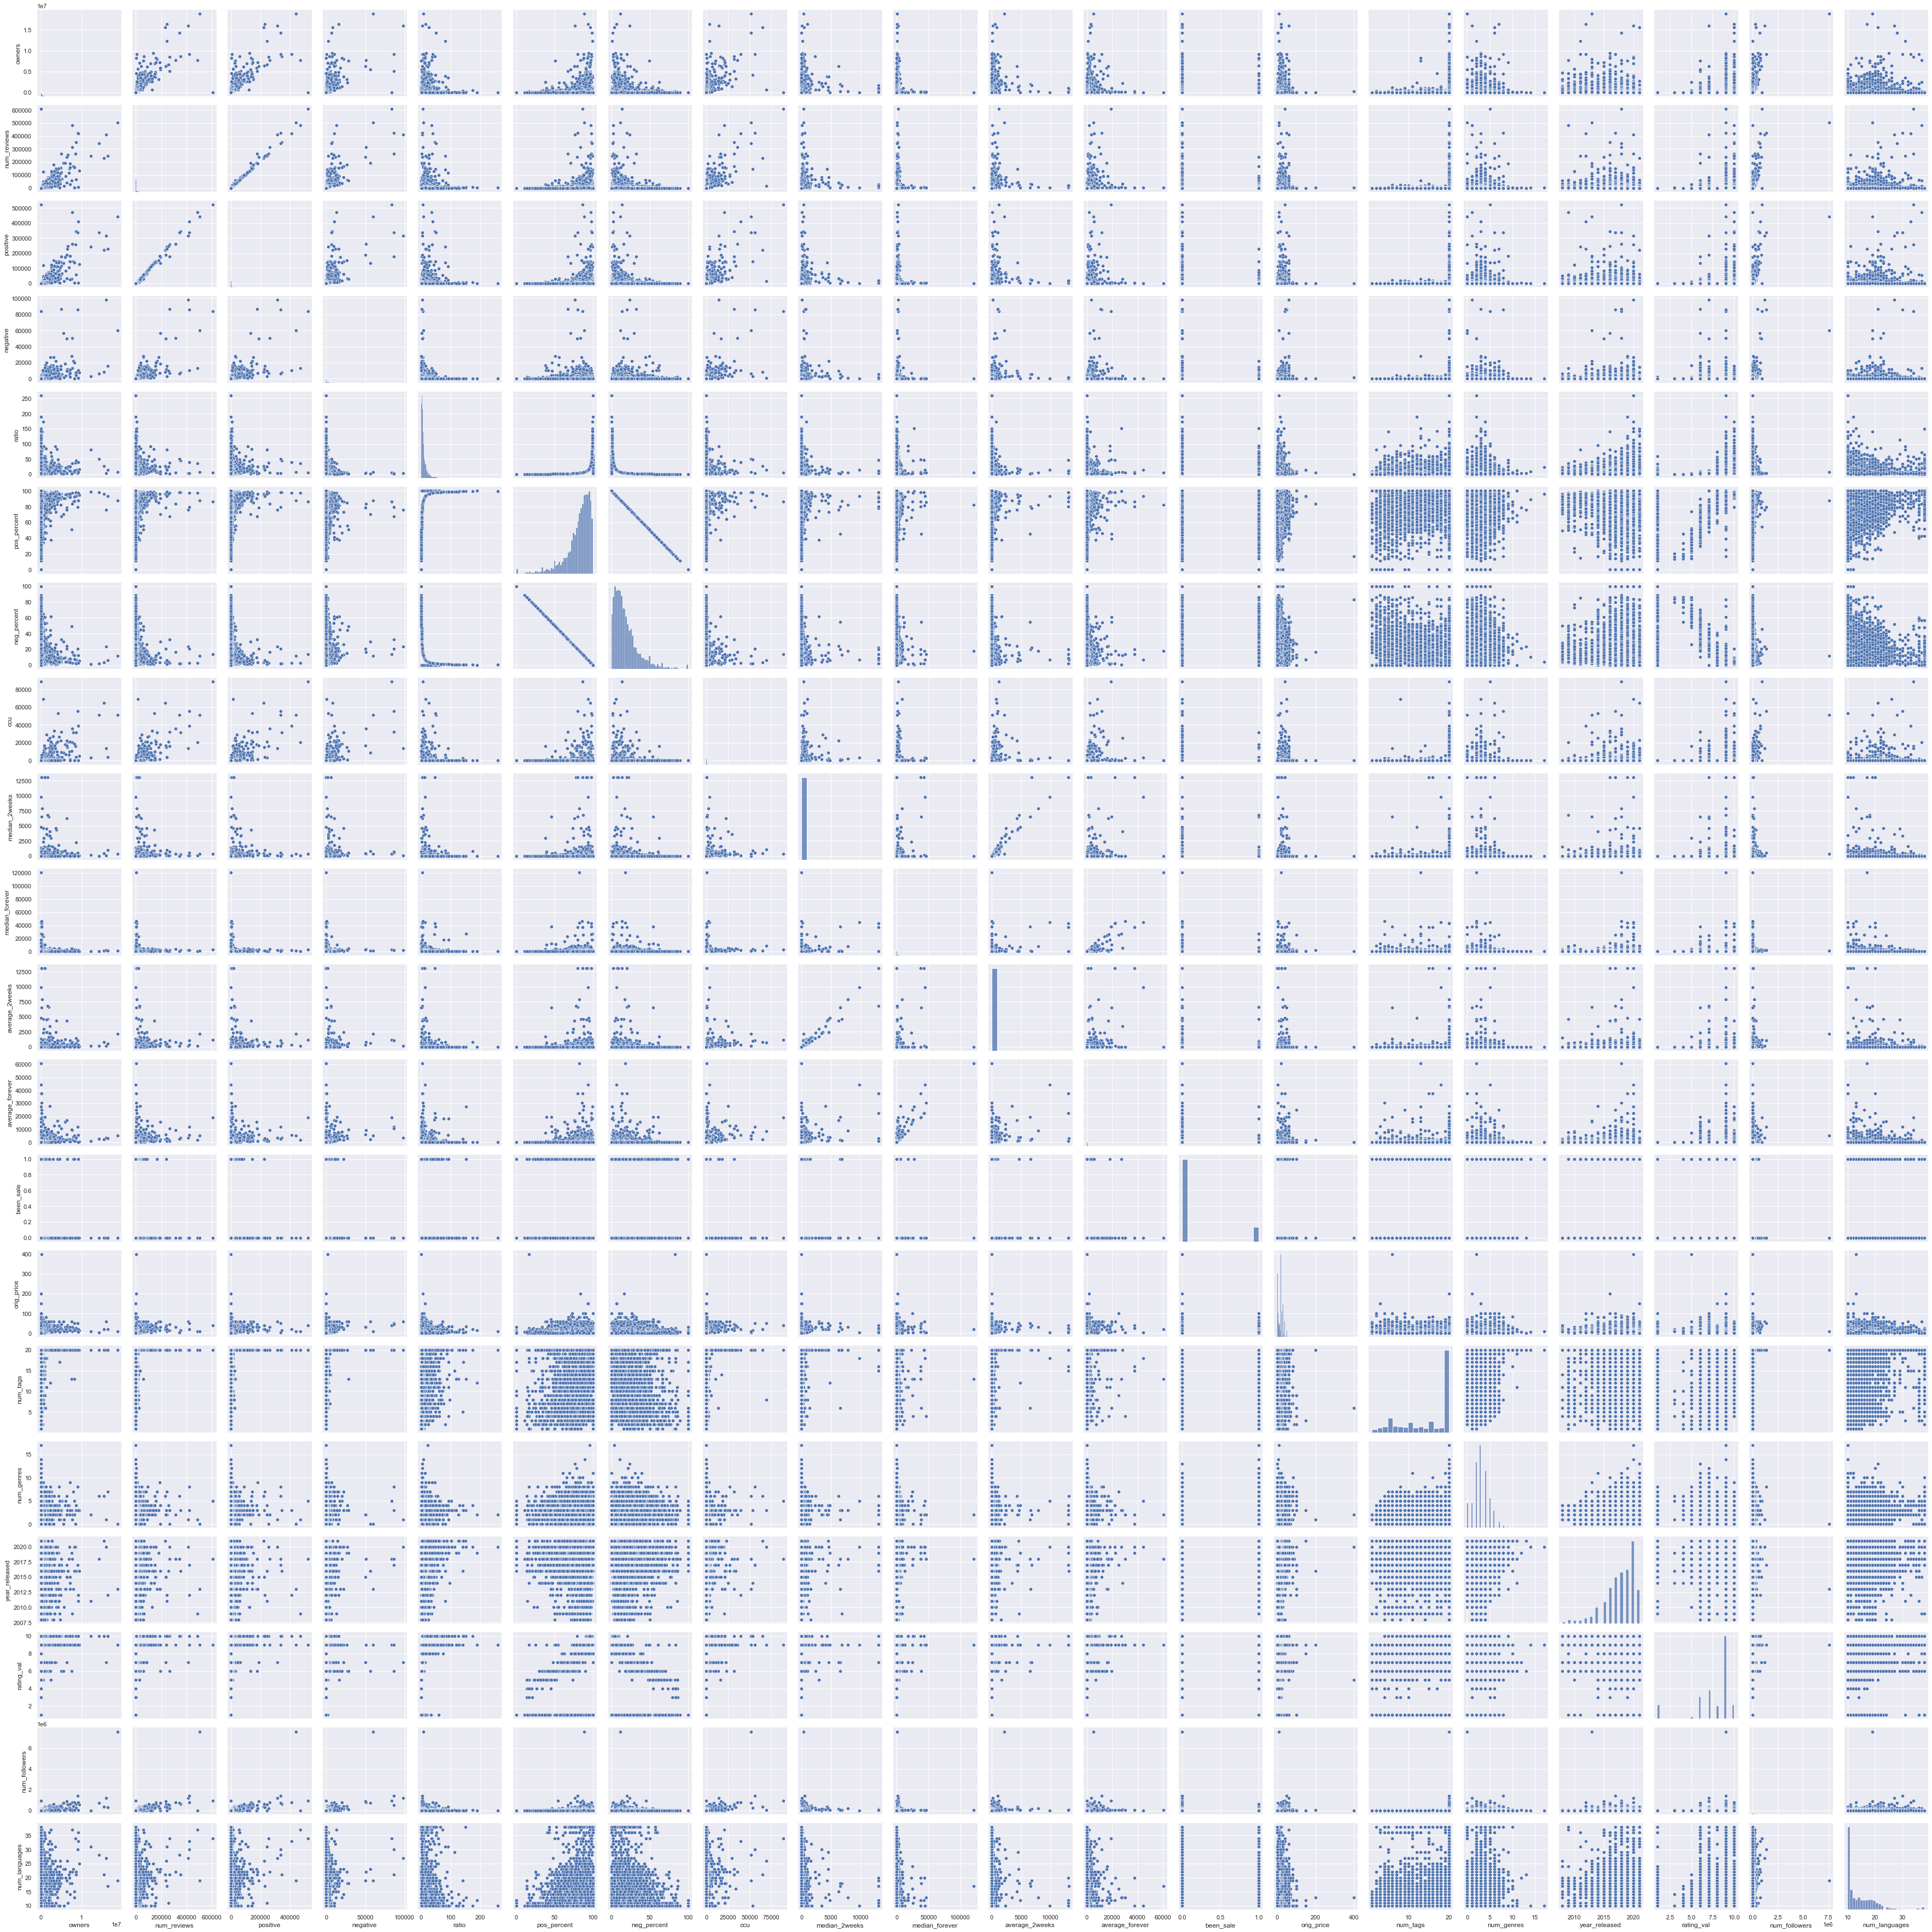

In [20]:
sns.pairplot(heatmapdf)

# Log Transformation
applying a log transformation to the target, also limiting to numerical features

In [21]:
df['owners_log'] = np.log(df.owners)

In [28]:
X, y = df.iloc[:,2:21], df.owners_log

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=7)

In [30]:
lr.fit(X_train, y_train)
lr.score(X_train, y_train)

0.5874621979178202

In [31]:
lr.score(X_val, y_val)

0.5890705362125058

Text(0.5, 1.0, 'Log Transformed')

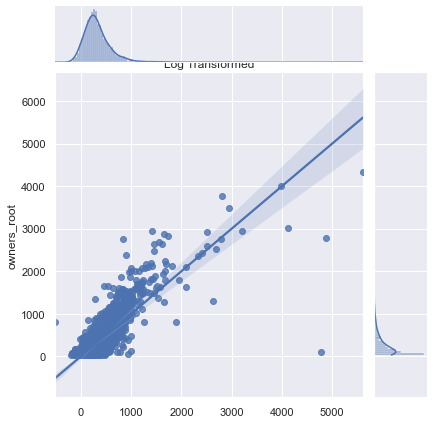

In [60]:
train_preds = lr.predict(X_train)

sns.jointplot(x = train_preds, y = y_train, kind='reg')
plt.title('Log Transformed')

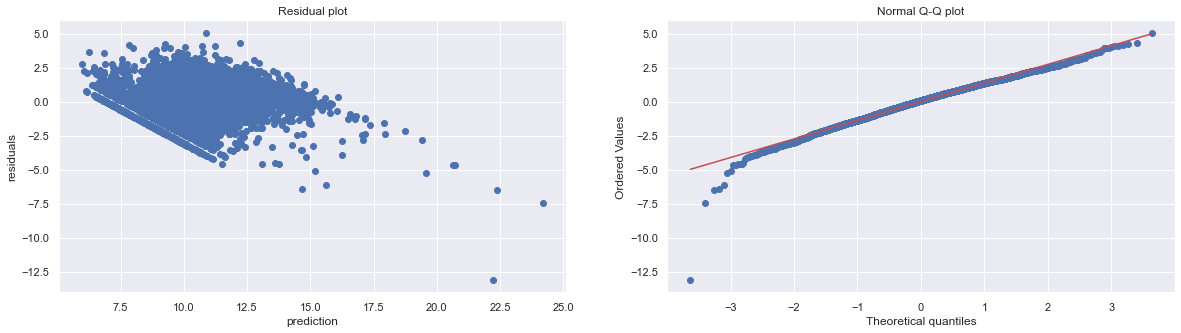

In [33]:
diagnostic_plot(X, y)

In [42]:
cols = list(df.columns)
cols.insert(1, cols.pop(cols.index('owners_log')))
df= df[cols]

In [46]:
logdf = df.drop(columns=['owners'])

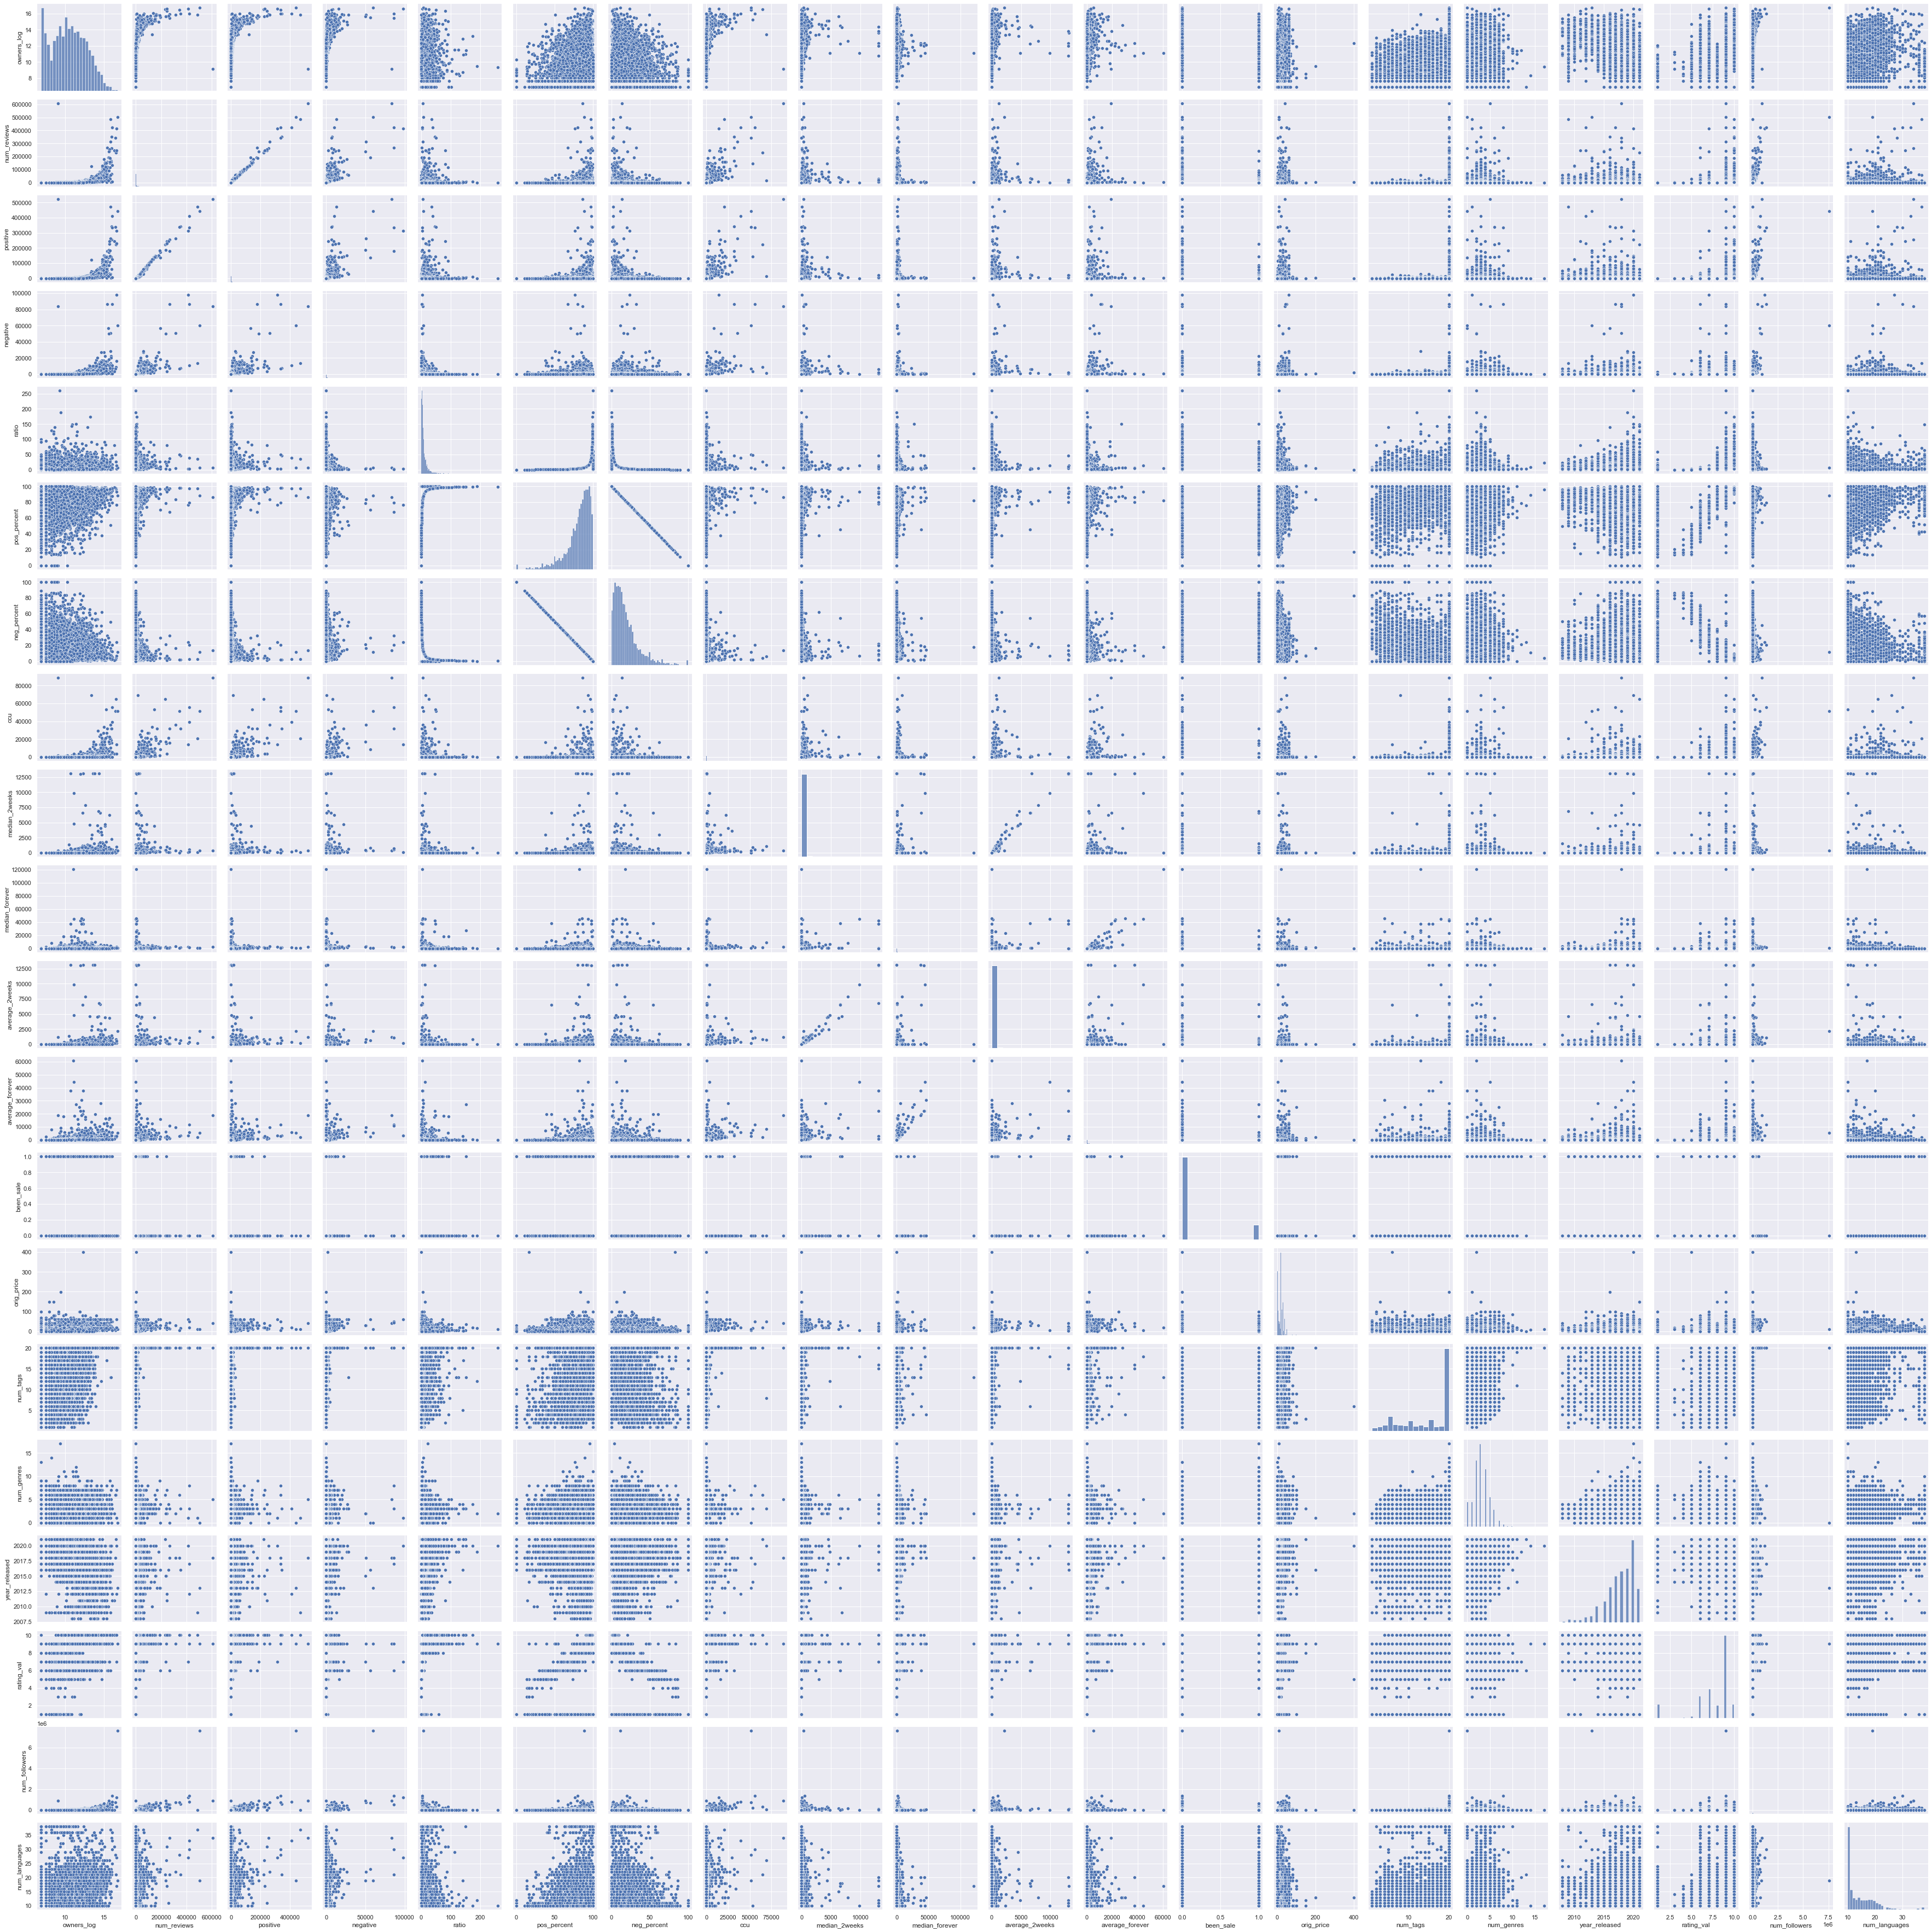

In [49]:
heatmapdf = logdf.iloc[:,1:21]
sns.pairplot(heatmapdf)

# Square Root transformation


In [34]:
df['owners_root'] = sqrt(df.owners)

In [35]:
X, y = df.iloc[:,2:21], df.owners_root

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=7)

In [38]:
lr.fit(X_train, y_train)
lr.score(X_train, y_train)

0.6862388787906346

In [39]:
lr.score(X_val, y_val)

0.6783944567972673

Text(0.5, 1.0, 'Root Transformed')

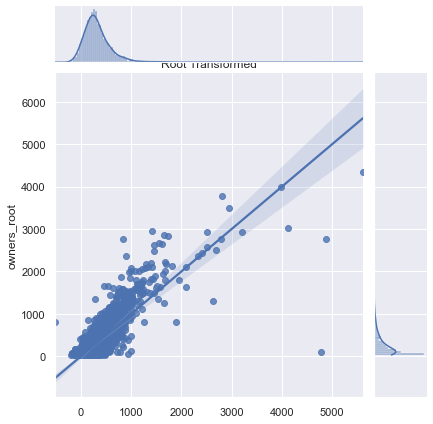

In [61]:
train_preds = lr.predict(X_train)

sns.jointplot(x = train_preds, y = y_train, kind='reg')
plt.title('Root Transformed')

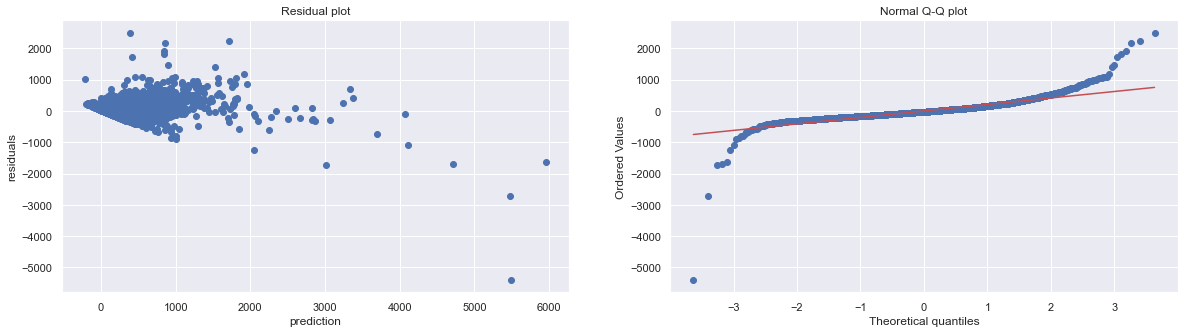

In [41]:
diagnostic_plot(X, y)

In [50]:
cols= list(df.columns)

In [51]:
cols.insert(1, cols.pop(cols.index('owners_root')))

In [53]:
rootdf =df[cols]

In [55]:
rootdf.drop(columns=['owners_log','owners'], inplace=True)

/usr/local/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


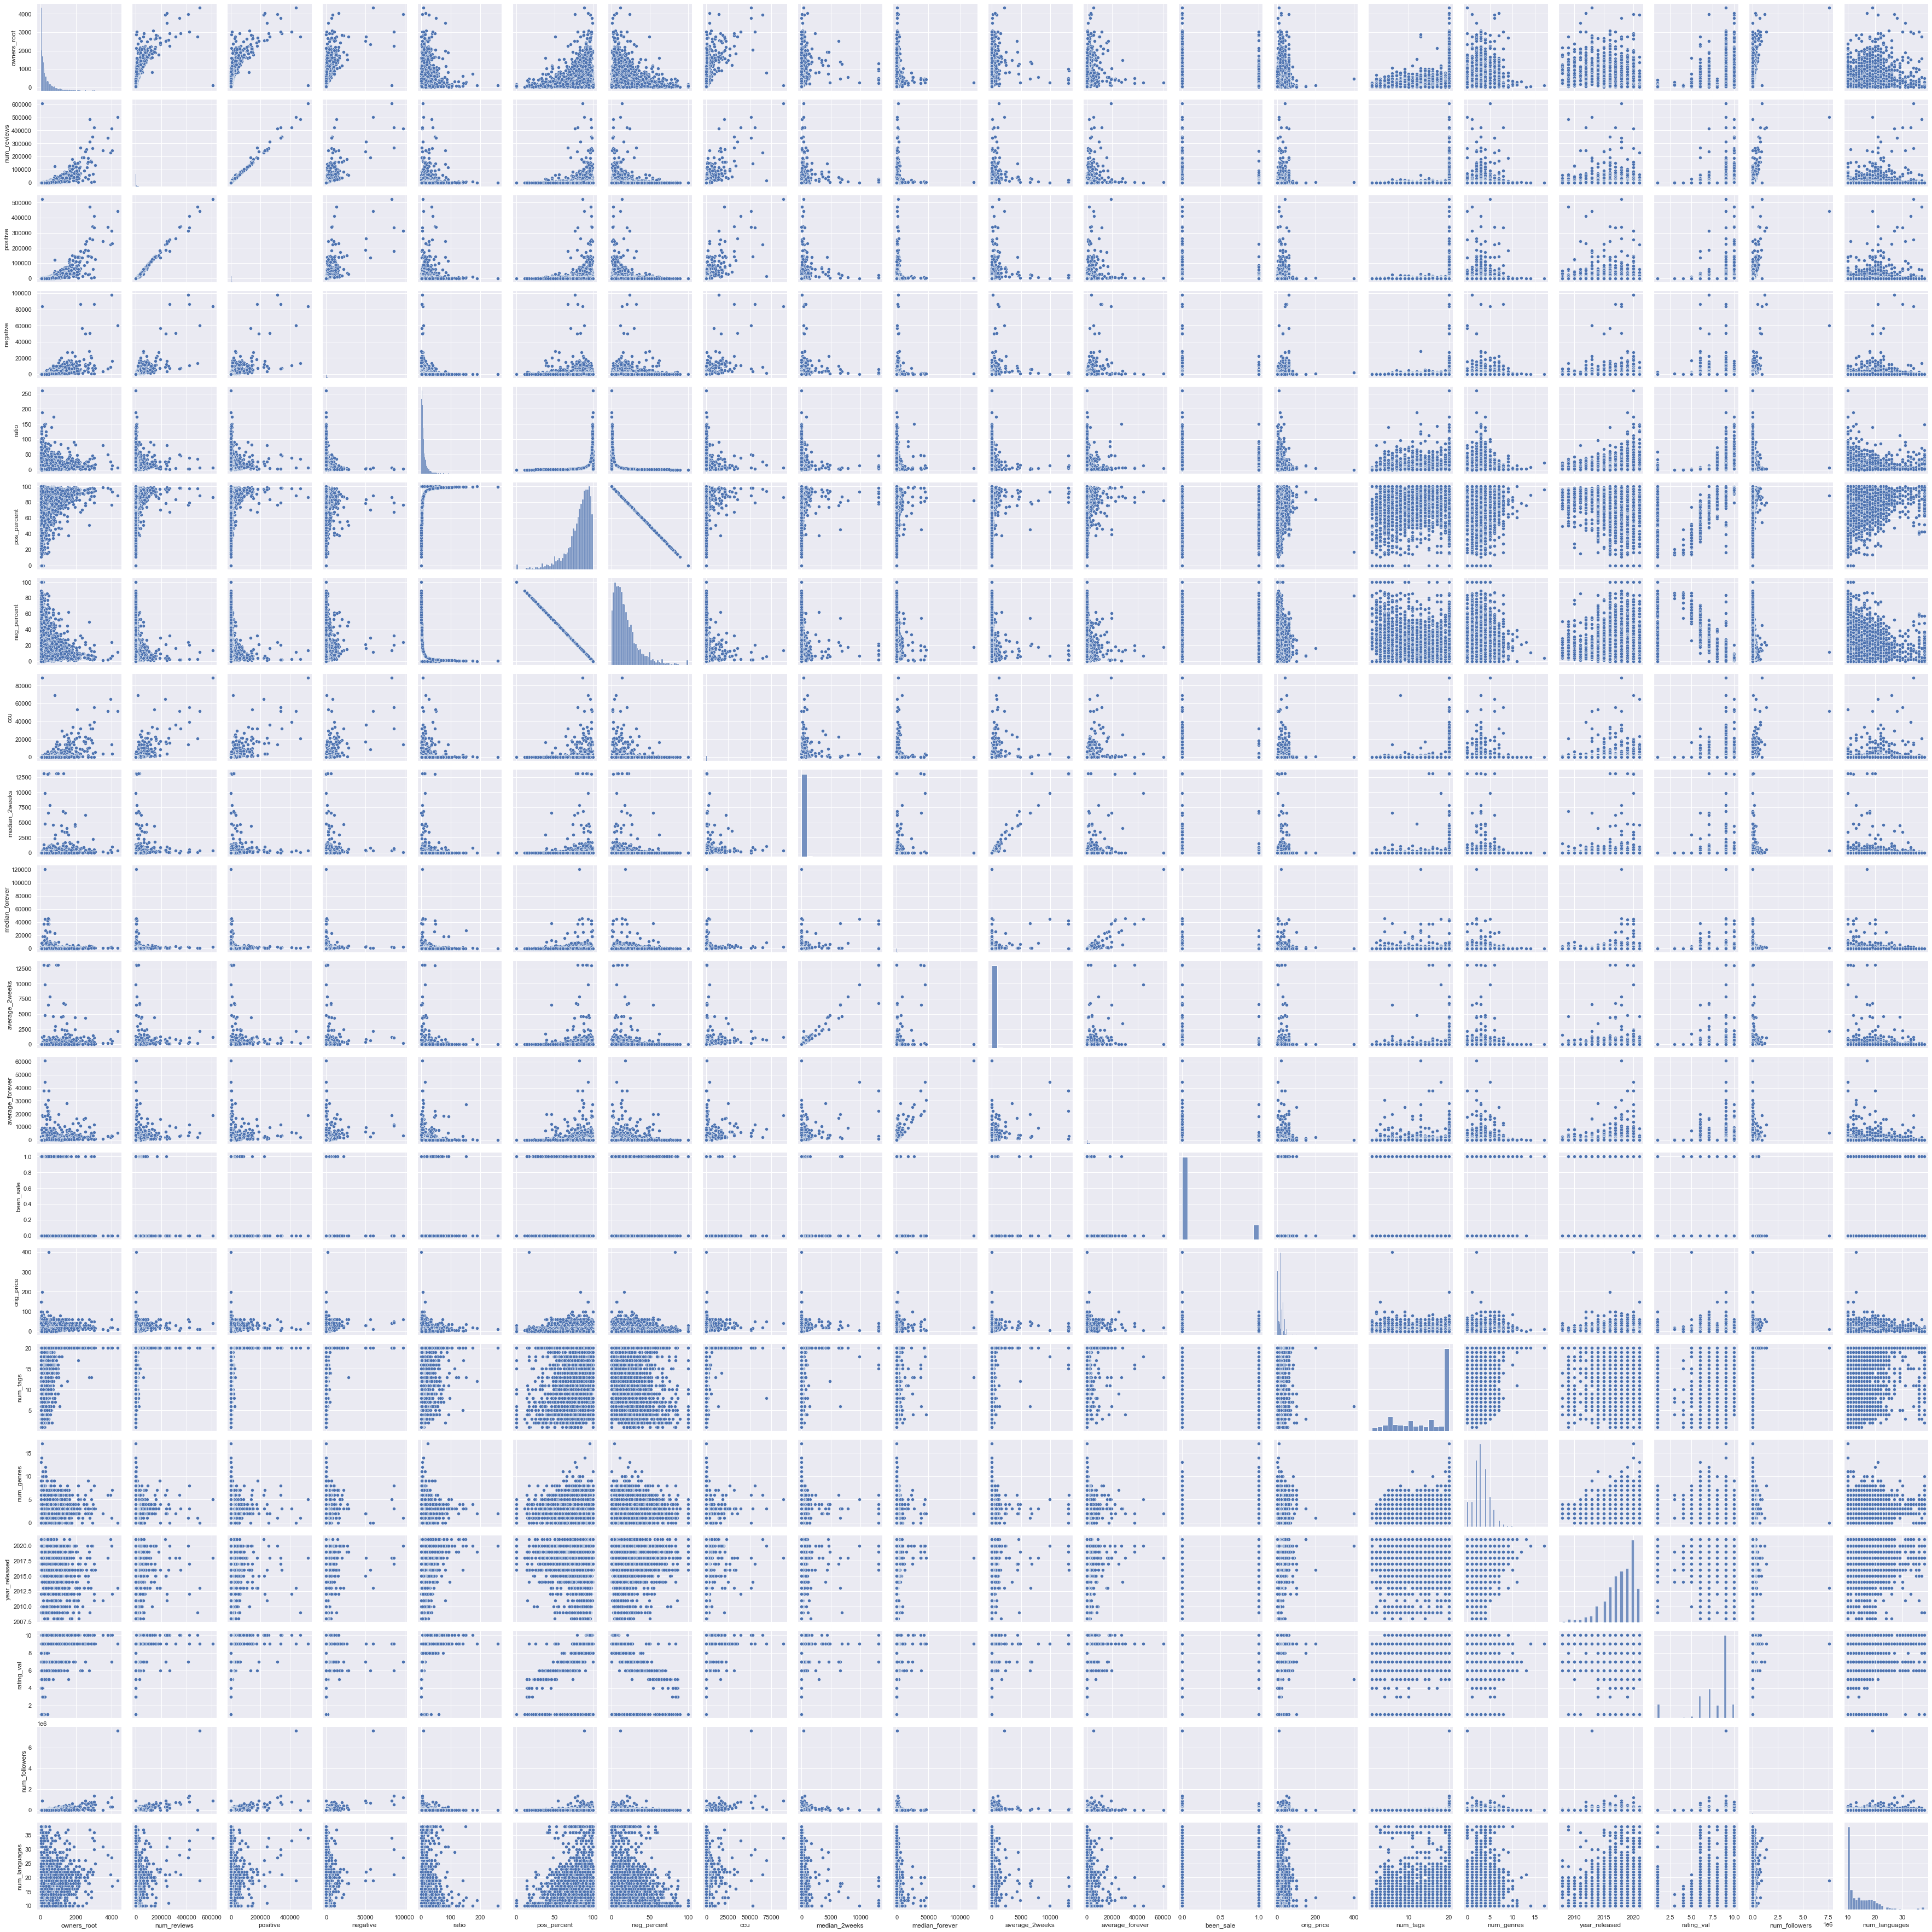

In [57]:
heatmapdf = rootdf.iloc[:,1:21]
sns.pairplot(heatmapdf)